In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sell_prices = pd.read_csv("/kaggle/input/m5-forecasting-accuracy/sell_prices.csv")
sales_train_evaluation = pd.read_csv("/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv")
calendar = pd.read_csv("/kaggle/input/m5-forecasting-accuracy/calendar.csv")
sales_train_validation = pd.read_csv("/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv")

In [4]:
#sell_prices.head()

In [5]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [6]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
#sales_train_validation.head()

In [8]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [9]:
sales_train_evaluation[sales_train_evaluation.columns[1:10]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   30490 non-null  object
 1   dept_id   30490 non-null  object
 2   cat_id    30490 non-null  object
 3   store_id  30490 non-null  object
 4   state_id  30490 non-null  object
 5   d_1       30490 non-null  int64 
 6   d_2       30490 non-null  int64 
 7   d_3       30490 non-null  int64 
 8   d_4       30490 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


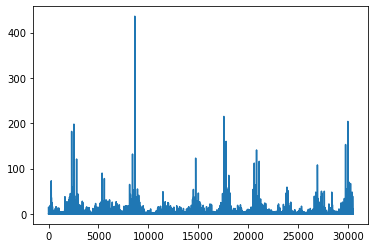

In [10]:
sales_train_evaluation['d_2'].plot()

In [11]:
sales_train_evaluation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [12]:
sales_train_evaluation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [13]:
# Id is a unique key
len(sales_train_evaluation['id'].unique())
len(sales_train_evaluation)

30490

In [14]:
d_cols = sales_train_evaluation.columns[6:]
d_cols

Index(['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1941)

In [15]:
sales_train_evaluation.set_index('id')[d_cols].T 

id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,3,6,3,0,0,1,0,1,0,0
d_1938,3,0,2,3,0,0,0,4,0,1,...,1,4,3,1,2,0,1,0,1,2
d_1939,3,0,3,0,2,5,1,1,0,0,...,3,4,3,1,1,0,0,1,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,...,0,1,0,0,3,1,1,0,1,5


In [16]:
sales_by_date = sales_train_evaluation.set_index('id')[d_cols].T
sales_by_date.head()

id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [17]:
date_merge = sales_by_date.merge(calendar,how="left" ,left_index =True,right_on='d').set_index('date')

In [18]:
date_merge.head()

,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [19]:
import seaborn as sns

In [20]:
# Total sales of an item
item_grp =pd.DataFrame(sales_train_evaluation.groupby(by="item_id").sum().sum(axis=1).sort_values(ascending= False),columns=['total_sales'])

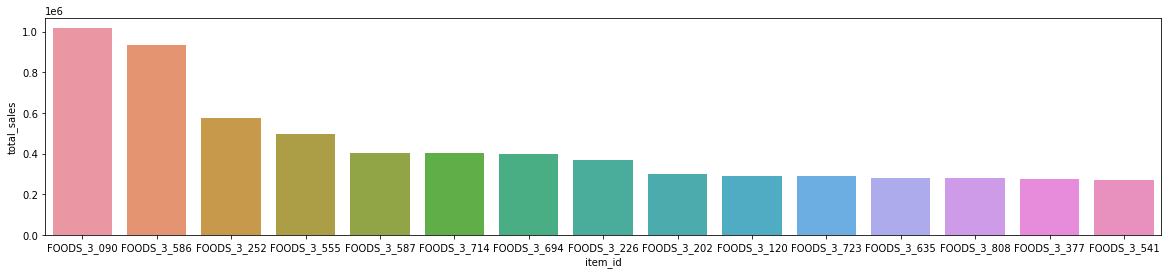

In [21]:
# Food items have maximum sales
plt.figure(figsize=(20,4))
sns.barplot(x="item_id",y="total_sales", data =item_grp.reset_index()[0:15] )

In [22]:
store_grp = sales_train_evaluation.groupby(['store_id','cat_id']).sum().sum(axis=1).reset_index()
store_grp.rename(columns={0:'sales'},inplace = True)

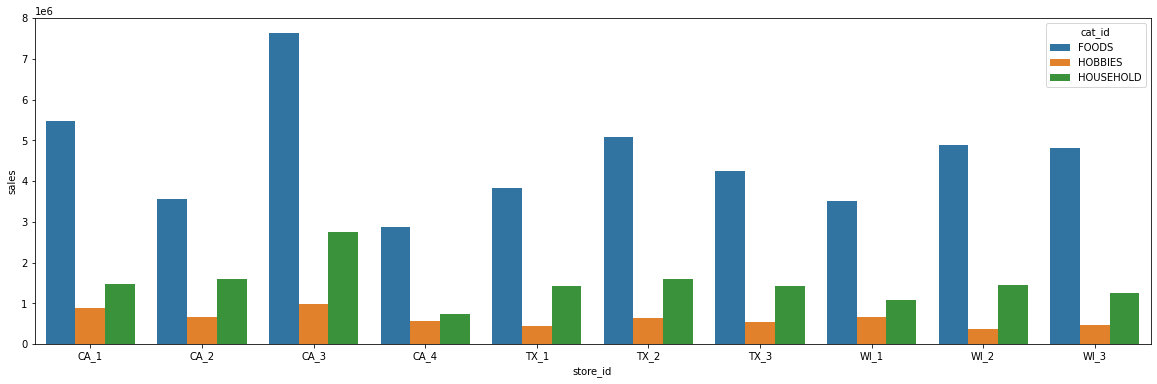

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x="store_id", y='sales', data=store_grp, hue ='cat_id')
# CA_3 most sales

In [24]:
daily_sales = date_merge.drop(sales_train_evaluation['id'].unique(),axis=1)
daily_sales['sales'] = date_merge[sales_train_evaluation['id'].unique()].sum(axis=1)


In [25]:
daily_sales

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
date,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,11616,Wednesday,5,5,2016,d_1937,NaN,NaN,NaN,NaN,0,0,0,37096
2016-05-19,11616,Thursday,6,5,2016,d_1938,NaN,NaN,NaN,NaN,0,0,0,36963
2016-05-20,11616,Friday,7,5,2016,d_1939,NaN,NaN,NaN,NaN,0,0,0,42552


In [26]:
daily_sales.head()

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
date,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146


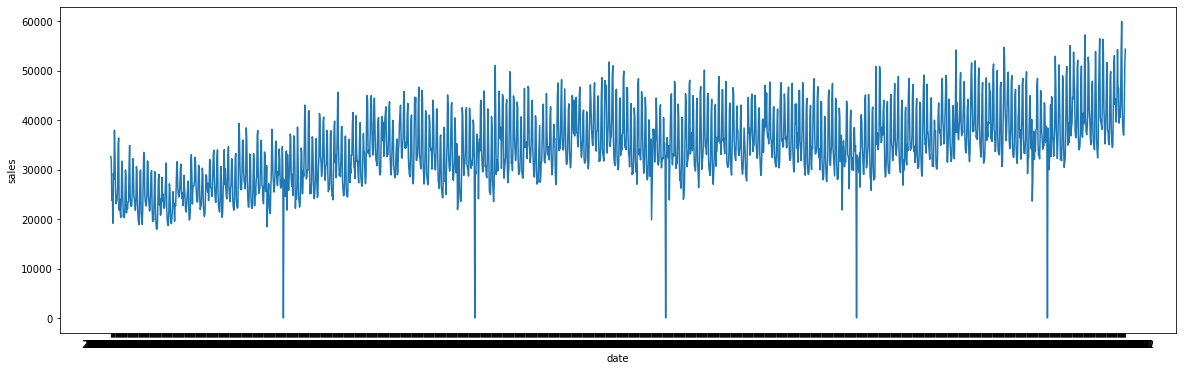

In [27]:
plt.figure(figsize=(20,6))
sns.lineplot(x="date", y="sales", data = daily_sales.reset_index())

In [28]:
#get max sales in each year
daily_sales

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
date,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,11616,Wednesday,5,5,2016,d_1937,NaN,NaN,NaN,NaN,0,0,0,37096
2016-05-19,11616,Thursday,6,5,2016,d_1938,NaN,NaN,NaN,NaN,0,0,0,36963
2016-05-20,11616,Friday,7,5,2016,d_1939,NaN,NaN,NaN,NaN,0,0,0,42552


In [29]:
daily_sales[daily_sales.groupby('year')['sales'].transform(max) == daily_sales['sales']]

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
date,,,,,,,,,,,,,,
2011-10-01,11136,Saturday,1,10,2011,d_246,NaN,NaN,NaN,NaN,1,1,0,39312
2012-09-09,11233,Sunday,2,9,2012,d_590,NaN,NaN,NaN,NaN,1,1,1,46649
2013-09-08,11333,Sunday,2,9,2013,d_954,NaN,NaN,NaN,NaN,1,0,1,51740
2014-03-09,11406,Sunday,2,3,2014,d_1136,NaN,NaN,NaN,NaN,1,1,1,50090
2015-10-03,11536,Saturday,1,10,2015,d_1709,NaN,NaN,NaN,NaN,1,1,1,54687
2016-05-15,11616,Sunday,2,5,2016,d_1934,NaN,NaN,NaN,NaN,0,1,1,59921


In [30]:
years =[2011,2012,2013,2014,2015,2016]
max_sales =pd.DataFrame(columns=daily_sales.columns)
for year in years:
    sel_df = daily_sales[daily_sales['year'] == year].sort_values(by="sales",ascending= False)[0:10]
    max_sales = pd.concat([max_sales,sel_df])
max_sales.groupby('month').count()   

,wm_yr_wk,weekday,wday,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
month,,,,,,,,,,,,,
1,2,2,2,2,2,0,0,0,0,2,2,2,2
2,6,6,6,6,6,0,0,0,0,6,6,6,6
3,5,5,5,5,5,0,0,0,0,5,5,5,5
4,6,6,6,6,6,0,0,0,0,6,6,6,6
5,4,4,4,4,4,0,0,0,0,4,4,4,4
6,3,3,3,3,3,0,0,0,0,3,3,3,3
7,2,2,2,2,2,0,0,0,0,2,2,2,2
8,7,7,7,7,7,0,0,0,0,7,7,7,7
9,10,10,10,10,10,1,1,0,0,10,10,10,10


In [31]:
daily_sales

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
date,,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,11616,Wednesday,5,5,2016,d_1937,NaN,NaN,NaN,NaN,0,0,0,37096
2016-05-19,11616,Thursday,6,5,2016,d_1938,NaN,NaN,NaN,NaN,0,0,0,36963
2016-05-20,11616,Friday,7,5,2016,d_1939,NaN,NaN,NaN,NaN,0,0,0,42552


In [32]:
sales_train_evaluation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [33]:
sales_train_evaluation.groupby('store_id').sum().T

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
d_1937,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268
d_1938,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398
d_1939,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126
d_1940,5764,7120,7073,3146,4167,4802,4712,5002,5213,4519


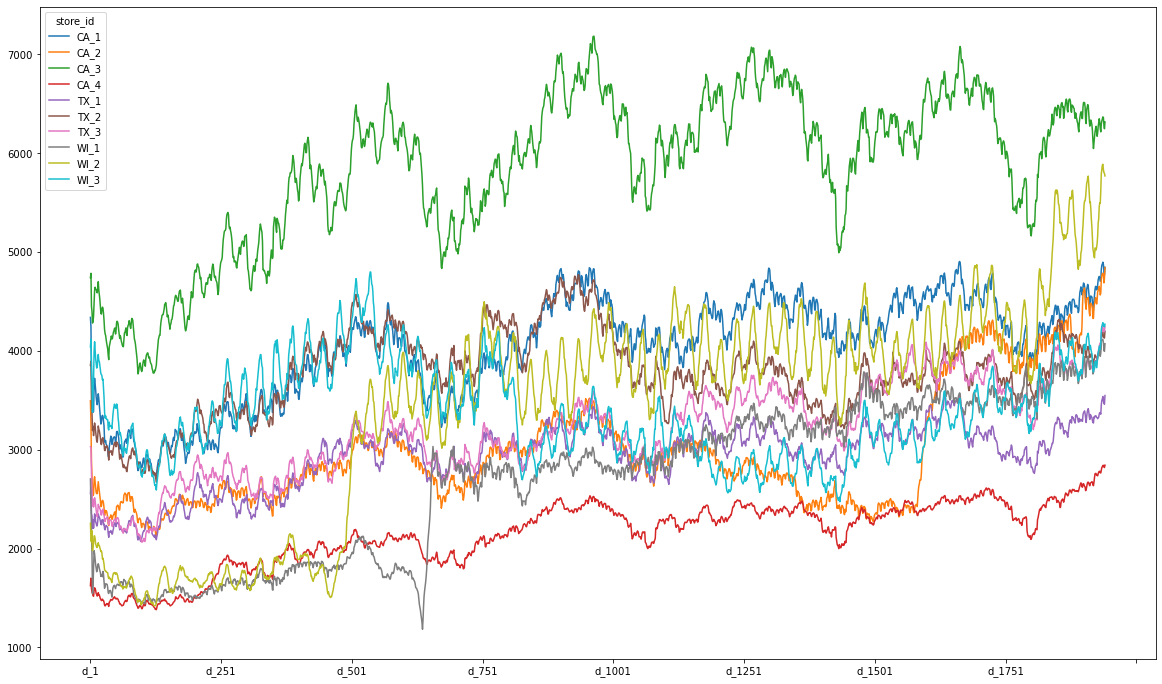

In [34]:
sales_train_evaluation.groupby('store_id').sum().T.rolling(20,min_periods=1).mean().plot(figsize=(20,12))

In [177]:
submission_df = pd.read_csv("/kaggle/input/m5-forecasting-accuracy/sample_submission.csv")
submission_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
av_30_col =sales_train_validation.columns[-30:]
run_avd_df =sales_train_validation.set_index('id')[av_30_col]

In [185]:
#pd.DataFrame(sales_train_validation.set_index('id')[av_30_col].mean(axis=1))

def getAvgValue():
    av_30_col =run_avd_df.columns[-30:]
    return run_avd_df[av_30_col].mean(axis=1).values

sub_col = submission_df.columns[1:]
for i in sub_col:
    run_avd_df[i] = getAvgValue()

In [186]:
av_30_col_eval =sales_train_evaluation.columns[-30:]
run_avd_df_eval =sales_train_evaluation.set_index('id')[av_30_col]

In [187]:
def getAvgValueEval():
    av_30_col_eval =run_avd_df_eval.columns[-30:]
    return run_avd_df_eval[av_30_col_eval].mean(axis=1).values

sub_col = submission_df.columns[1:]
for i in sub_col:
    run_avd_df_eval[i] = getAvgValueEval()

In [189]:
run_avd_df_eval[sub_col]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_evaluation,0.966667,0.965556,0.964407,0.963221,0.995328,1.028506,1.062789,1.098216,1.134823,1.139317,...,1.055737,1.090928,1.093959,1.097091,1.033661,1.068116,1.070387,1.072733,1.075158,1.010996
HOBBIES_1_002_CA_1_evaluation,0.133333,0.104444,0.074593,0.043746,0.045204,0.046711,0.048268,0.049877,0.051539,0.053257,...,0.071539,0.073923,0.076388,0.078934,0.081565,0.084284,0.087093,0.089996,0.059663,0.061652
HOBBIES_1_003_CA_1_evaluation,0.566667,0.552222,0.570630,0.589651,0.609306,0.629616,0.650603,0.672290,0.694699,0.684523,...,0.880228,0.876236,0.838777,0.800070,0.793405,0.753186,0.744959,0.736457,0.727672,0.751928
HOBBIES_1_004_CA_1_evaluation,2.100000,1.970000,1.835667,1.896856,1.960084,2.025420,2.092934,2.062699,2.098122,2.101393,...,2.141865,2.113260,2.183702,2.223159,2.297264,2.207173,2.147412,2.185659,2.258515,2.300465
HOBBIES_1_005_CA_1_evaluation,1.266667,1.308889,1.352519,1.364269,1.409745,1.323403,1.234183,1.275322,1.284500,1.193983,...,1.381378,1.394091,1.407227,1.387468,1.400384,1.413730,1.460854,1.476216,1.492090,1.475160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_WI_3_evaluation,0.200000,0.206667,0.213556,0.220674,0.228030,0.235631,0.243485,0.251601,0.259988,0.268654,...,0.291987,0.301720,0.311777,0.255503,0.264020,0.272821,0.281915,0.291312,0.301022,0.277723
FOODS_3_824_WI_3_evaluation,0.300000,0.310000,0.320333,0.331011,0.342045,0.353446,0.365228,0.377402,0.356649,0.335204,...,0.223458,0.230906,0.238603,0.246557,0.254775,0.263268,0.272043,0.281111,0.290482,0.300165
FOODS_3_825_WI_3_evaluation,0.866667,0.895556,0.892074,0.888477,0.918092,0.948696,0.980319,1.012996,1.013429,1.013877,...,0.788472,0.814754,0.841912,0.803309,0.796753,0.823312,0.784089,0.810225,0.803899,0.830696


In [192]:
pred_df =pd.concat([run_avd_df[sub_col],run_avd_df_eval[sub_col]]).fillna(0)

In [193]:
pred_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_validation,0.966667,0.965556,0.964407,0.963221,0.995328,1.028506,1.062789,1.098216,1.134823,1.139317,...,1.055737,1.090928,1.093959,1.097091,1.033661,1.068116,1.070387,1.072733,1.075158,1.010996
HOBBIES_1_002_CA_1_validation,0.133333,0.104444,0.074593,0.043746,0.045204,0.046711,0.048268,0.049877,0.051539,0.053257,...,0.071539,0.073923,0.076388,0.078934,0.081565,0.084284,0.087093,0.089996,0.059663,0.061652
HOBBIES_1_003_CA_1_validation,0.566667,0.552222,0.570630,0.589651,0.609306,0.629616,0.650603,0.672290,0.694699,0.684523,...,0.880228,0.876236,0.838777,0.800070,0.793405,0.753186,0.744959,0.736457,0.727672,0.751928
HOBBIES_1_004_CA_1_validation,2.100000,1.970000,1.835667,1.896856,1.960084,2.025420,2.092934,2.062699,2.098122,2.101393,...,2.141865,2.113260,2.183702,2.223159,2.297264,2.207173,2.147412,2.185659,2.258515,2.300465
HOBBIES_1_005_CA_1_validation,1.266667,1.308889,1.352519,1.364269,1.409745,1.323403,1.234183,1.275322,1.284500,1.193983,...,1.381378,1.394091,1.407227,1.387468,1.400384,1.413730,1.460854,1.476216,1.492090,1.475160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_WI_3_evaluation,0.200000,0.206667,0.213556,0.220674,0.228030,0.235631,0.243485,0.251601,0.259988,0.268654,...,0.291987,0.301720,0.311777,0.255503,0.264020,0.272821,0.281915,0.291312,0.301022,0.277723
FOODS_3_824_WI_3_evaluation,0.300000,0.310000,0.320333,0.331011,0.342045,0.353446,0.365228,0.377402,0.356649,0.335204,...,0.223458,0.230906,0.238603,0.246557,0.254775,0.263268,0.272043,0.281111,0.290482,0.300165
FOODS_3_825_WI_3_evaluation,0.866667,0.895556,0.892074,0.888477,0.918092,0.948696,0.980319,1.012996,1.013429,1.013877,...,0.788472,0.814754,0.841912,0.803309,0.796753,0.823312,0.784089,0.810225,0.803899,0.830696


In [171]:
#val_df =sales_train_evaluation.set_index('id')[d_cols[-28:]].sort_index()
#val_df.columns =sub_col

In [176]:
#np.sqrt(np.square(val_df - pred_df.sort_index()).values.sum()/(val_df.shape[0]*val_df.shape[1]))

In [194]:
pred_df.to_csv('submission.csv')